In [39]:
# Clustered dataset creation
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=500,n_features=2,random_state=3,centers=5)
print(x.shape,y.shape)


(500, 2) (500,)


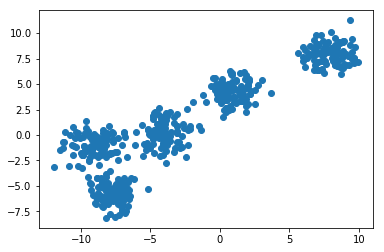

In [40]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [115]:
# We can observe that -10<x<10 and -10.0 < y < 10
# Initialize the centers
# This code generates centers x and y coordinates in range of -10 to 10
import numpy as np
center = [10*(2*np.random.random((x.shape[1],))-1)]
print(center)


[array([ 2.29584674, -9.04701584])]


In [116]:
k = 5
colors = ['orange','green','blue','red','purple']
points = []
clusters = [] # This list will store clusters in the form of dictionary.
for i in range(k):
    center = [10*(2*np.random.random((x.shape[1],))-1)]
    cluster = {
        'center':center,
        'points':points,
        'color':colors[i]
    }
    clusters.append(cluster)

In [117]:
clusters


[{'center': [array([-7.52487215,  0.35258534])],
  'color': 'orange',
  'points': []},
 {'center': [array([1.01244062, 6.61383363])], 'color': 'green', 'points': []},
 {'center': [array([-9.49491658, -5.91264629])],
  'color': 'blue',
  'points': []},
 {'center': [array([-1.03843716,  2.07572462])], 'color': 'red', 'points': []},
 {'center': [array([-5.86012707, -2.69966846])],
  'color': 'purple',
  'points': []}]

In [118]:
# Distance calculation(Euclidiant distance)
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [119]:
v1 = np.array([2,3])
v2 = np.array([3,5])
distance(v1,v2)

2.23606797749979

In [120]:
def assignment(clusters): # E - Step
    for i in range(x.shape[0]):
        dist = []
        current_pt = x[i]
        for kx in range(k):
            d = distance(current_pt,clusters[kx]['center'])
            dist.append(d)
        current_cluster_index = np.argmin(dist)
        clusters[current_cluster_index]['points'].append(current_pt)

In [121]:
assignment(clusters)

In [122]:
for i in range(k):
    print(len(clusters[i]['points']))

500
500
500
500
500


In [106]:
def plot_cluster(clusters):
    for kx in range(k):
        # plot cluster points
        points = np.array(clusters[kx]['points'])
       
        try:
            plt.scatter(points[:,0],points[:,1])
        except:
            pass
             # plot cluster center
        Ux = np.array(clusters[kx]['center'])
        print(Ux)
        plt.scatter(Ux[:,0],Ux[:,1],marker='*',color = 'black')


[[-6.25685351 -3.89255542]]
[[4.73712657 0.9185839 ]]
[[ 4.26073189 -0.13830467]]
[[-7.16848633 -7.61904772]]
[[-2.16091169 -9.40309194]]


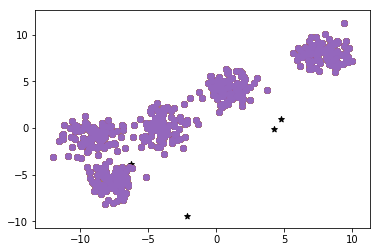

In [107]:
plot_cluster(clusters)